# Credit Card Fraud Detection

In [74]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, classification_report, average_precision_score
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [75]:
data = pd.read_csv("../dataset/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [76]:
data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
207963,136910.0,-0.447498,1.100446,-0.760437,-0.255493,1.340003,-0.822954,1.054756,-0.025179,0.086239,...,0.040189,0.347786,-0.265195,0.436729,-0.014999,0.656284,0.357683,0.283640,29.56,0
251111,155221.0,2.019134,0.045481,-1.622975,0.354515,0.297694,-0.686368,0.021513,-0.047364,0.365402,...,-0.311817,-0.875259,0.362343,0.643758,-0.345197,0.145811,-0.072392,-0.040853,1.29,0
181347,124935.0,-0.300816,1.178351,-0.052221,-0.549457,0.158970,-1.152666,0.738638,0.162393,-0.362303,...,-0.203553,-0.501128,0.127273,0.064446,-0.431033,0.136800,0.126281,0.037706,9.12,0
91015,63275.0,-1.077577,-0.697558,1.766297,-1.599526,-1.107269,-0.303380,-1.268822,0.546426,-2.908169,...,0.141642,0.415963,-0.235636,0.028705,0.231707,0.026542,-0.010366,-0.089519,29.00,0
60582,49389.0,1.018543,-0.983850,0.787777,0.531862,-1.291892,0.368429,-0.931539,0.342575,-0.394818,...,-0.128508,-0.054325,-0.096821,-0.056045,0.314117,-0.213106,0.058298,0.033077,107.00,0
243009,151752.0,-0.278026,-0.566352,0.911779,-3.052010,-0.994876,0.437371,-1.299700,0.697295,-1.788577,...,0.073192,0.529444,0.149765,0.267430,-1.178983,-0.524397,0.163511,0.167966,8.00,0
248624,154018.0,-0.743766,0.790191,0.296618,-0.152954,1.812856,-0.772049,1.341706,-0.139254,-0.961579,...,0.174900,0.487214,-0.457543,-0.386113,0.659436,-0.576907,0.074476,0.109691,1.00,0
37303,38899.0,-2.406159,-1.185139,1.008022,-1.606426,-0.040870,-0.384155,-0.459308,0.055449,-0.985835,...,0.118761,0.441161,-0.659557,-0.409857,-0.298955,-0.526718,-0.539260,-0.092134,89.95,0
125262,77594.0,-0.342563,-0.059450,0.281512,-2.265535,-0.662281,-0.077361,-0.139079,0.333248,-3.139266,...,-0.433843,-1.205055,0.132604,-0.902549,-0.000485,-0.514380,-0.115233,-0.054674,76.45,0
242794,151656.0,1.877241,0.432198,0.258112,3.754653,-0.190667,0.078811,-0.344342,0.046259,-0.594413,...,-0.145938,-0.432684,0.420306,-0.106209,-0.562498,-0.365206,0.010714,-0.023486,5.99,0


In [77]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [78]:
data.shape

(284807, 31)

In [79]:
# checking for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

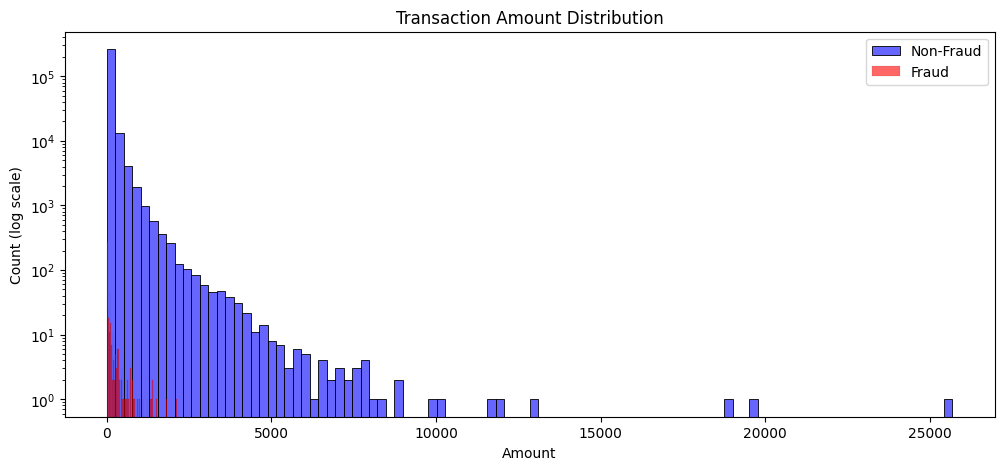

In [80]:
# exploratory data analysis (eda)
plt.figure(figsize=(12,5))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=100, color='blue', label='Non-Fraud', alpha=0.6)
sns.histplot(data[data['Class'] == 1]['Amount'], bins=100, color='red', label='Fraud', alpha=0.6)
plt.yscale('log')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count (log scale)')
plt.legend()
plt.show()


/tmp/ipykernel_24255/2112623404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate_by_hour.index, y=fraud_rate_by_hour.values, palette='Reds_r')


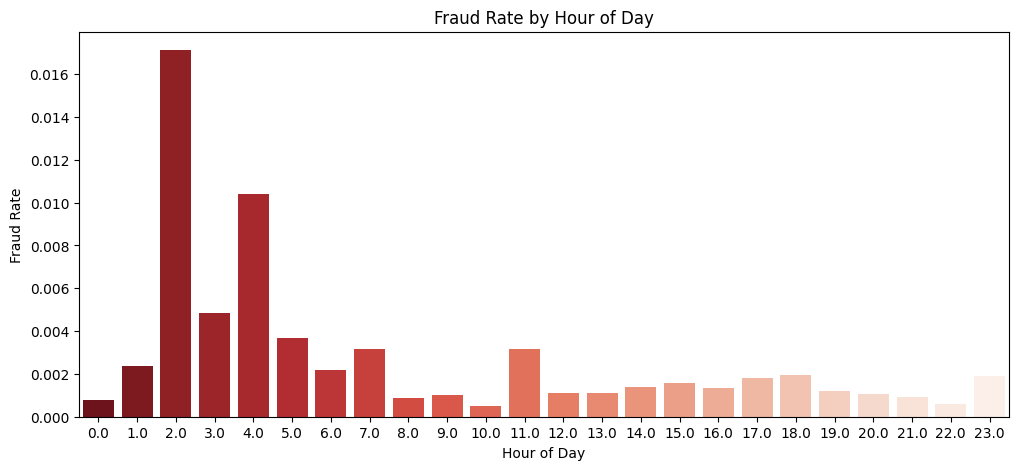

In [81]:
# Create hour feature
data['Hour'] = (data['Time'] // 3600) % 24

# Compute fraud rate per hour
fraud_rate_by_hour = data.groupby('Hour')['Class'].mean()

plt.figure(figsize=(12,5))
sns.barplot(x=fraud_rate_by_hour.index, y=fraud_rate_by_hour.values, palette='Reds_r')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.show()


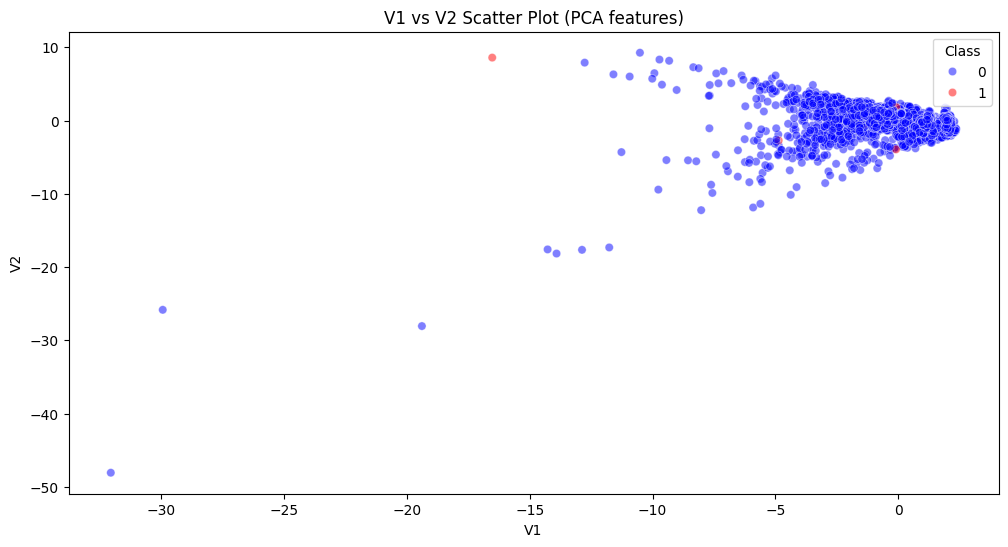

In [82]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    x='V1', y='V2',
    hue='Class',
    data=data.sample(5000, random_state=42),
    palette={0:'blue', 1:'red'},
    alpha=0.5
)
plt.title('V1 vs V2 Scatter Plot (PCA features)')
plt.show()

In [83]:
# preprocessing the dataset
data.shape


(284807, 32)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [85]:
data["Hour"].value_counts()

Hour
21.0    17703
18.0    17039
11.0    16856
20.0    16756
10.0    16598
14.0    16570
15.0    16461
16.0    16453
17.0    16166
9.0     15838
19.0    15649
22.0    15441
12.0    15420
13.0    15365
23.0    10938
8.0     10276
0.0      7695
7.0      7243
1.0      4220
6.0      4101
3.0      3492
2.0      3328
5.0      2990
4.0      2209
Name: count, dtype: int64

In [86]:
data["Time"].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
172760.0     1
172758.0     1
172757.0     1
172756.0     1
172754.0     1
Name: count, Length: 124592, dtype: int64

In [87]:
data["Time"].sample(10)

85563      60829.0
63123      50569.0
207120    136527.0
283405    171570.0
23840      32945.0
282047    170624.0
114356     73449.0
227010    144897.0
160016    113082.0
269237    163600.0
Name: Time, dtype: float64

In [88]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [89]:
data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
46539,42826.0,-0.657727,-0.285305,1.292109,0.650178,1.383632,5.107004,-0.803012,1.381867,0.794019,...,0.291032,-0.008501,1.041024,0.108978,-0.112092,0.196503,0.150453,108.64,0,11.0
179798,124244.0,-1.053241,1.798058,-0.488457,-0.415559,-0.099435,-0.727983,-0.192718,-2.104265,-0.332180,...,0.814696,0.325131,0.493482,-0.816632,-0.249006,0.488086,0.281158,0.89,0,10.0
202915,134551.0,1.985143,-0.395635,-0.896219,0.734073,-0.354579,-0.005468,-0.740847,0.120489,1.680869,...,0.731643,0.019649,0.565323,0.028191,0.751900,-0.005753,-0.024425,10.09,0,13.0
141134,84139.0,1.079845,0.058641,0.490327,1.502738,-0.406647,-0.373534,0.064457,0.000026,0.382770,...,-0.077002,-0.040379,0.401298,0.581733,-0.333784,0.029204,0.023207,40.19,0,23.0
50011,44304.0,1.118176,-0.113425,1.341694,1.211844,-1.128599,-0.133668,-0.745899,0.283339,0.707395,...,0.167271,0.031323,0.489935,0.286082,-0.424303,0.057538,0.026498,1.18,0,12.0
250316,154839.0,-0.993412,-0.000103,1.738832,0.691659,1.908540,2.330671,-0.040711,0.686195,0.017318,...,-1.082838,-0.071301,-1.041314,0.162401,-0.744686,-0.036052,-0.153319,7.48,0,19.0
227045,144915.0,0.345977,0.589911,-1.987800,-1.873499,3.813633,2.914869,1.391915,0.074685,-0.315781,...,0.984990,-0.215589,0.764296,-0.714649,0.062432,-0.242969,-0.215844,6.09,0,16.0
273186,165466.0,-1.378700,-2.664125,0.827916,-0.899675,1.421301,-2.245655,-1.073070,-0.102632,-0.265255,...,0.603164,0.535379,-0.012121,-0.848655,-0.286172,-0.056516,0.041336,75.00,0,21.0
54444,46453.0,-0.788570,-0.968760,1.375806,-2.243567,-1.499712,-0.610412,0.707797,-0.289512,-2.605934,...,0.620125,0.314170,0.391548,0.320517,-0.160485,0.014097,0.125012,259.95,0,12.0
42566,41153.0,0.232154,-1.899234,0.635438,0.556593,-1.226997,1.055889,-0.362123,0.403382,0.898295,...,-0.344161,-0.249322,-0.209342,-0.216519,0.907938,-0.088009,0.072934,444.42,0,11.0


In [90]:
data = data.drop("Hour", axis=1)
data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
201340,133844.0,-0.508352,0.636960,0.214740,0.345024,0.378262,0.743932,0.359587,0.682077,-0.013246,...,-0.225612,-0.701411,0.505142,0.212129,-1.337113,-1.356901,0.184800,0.211331,74.39,0
21683,31805.0,-3.568808,2.562533,0.506607,1.109290,-2.110745,0.377176,-1.872051,2.190602,0.225062,...,0.187958,-0.077079,0.134955,0.049715,0.162020,-0.445737,-2.168416,-0.722917,1.00,0
235584,148450.0,-0.282519,0.694515,-0.557503,-0.548196,0.851066,-0.658259,1.459352,-0.358553,0.321775,...,-0.454704,-0.845949,0.345956,0.461371,-0.316711,0.106900,0.229112,-0.119589,95.34,0
222595,143044.0,2.038860,-0.318358,-0.669545,0.227902,-0.056558,0.266411,-0.561667,-0.012460,1.263987,...,0.157498,0.755934,0.043065,0.100166,0.076290,-0.208356,0.046335,-0.033329,9.99,0
263579,161020.0,-0.065714,0.782254,-0.431912,-0.739127,1.707236,1.306037,0.766773,0.346951,-0.164104,...,0.488292,1.824593,0.019699,-0.625262,-1.040679,-0.123319,0.579833,0.315446,9.50,0
94457,64896.0,1.259054,-0.803489,0.189878,-0.725997,-0.761770,0.019347,-0.669948,0.141403,-0.712120,...,0.081517,0.115383,-0.076653,-0.300425,0.430795,-0.222514,0.003836,0.001520,52.95,0
113188,72974.0,-4.579254,5.314970,-3.374267,-0.312329,1.645015,0.324419,1.815086,-0.819098,5.488063,...,-1.305494,0.280112,0.113242,-1.481669,0.030713,-0.656489,-0.687190,-2.728847,0.79,0
179192,123962.0,-1.591201,2.026604,-2.940146,-2.559571,3.189372,2.697165,1.096649,0.668495,0.772254,...,0.026035,0.647953,-0.126998,0.728163,0.089803,0.141704,1.158752,0.696494,19.99,0
224441,143792.0,1.876676,-2.177951,-0.700549,-1.363697,-1.696762,-0.106372,-1.289064,-0.104700,-0.846756,...,0.165955,0.603782,-0.004494,0.698479,-0.234386,-0.041142,0.005194,0.000972,221.73,0
222094,142820.0,-2.933096,0.661911,-1.503391,-0.008355,0.222246,1.553529,-1.856445,-6.870123,0.385476,...,-1.726942,-0.362145,1.495377,0.219592,-0.220524,0.199185,0.015406,0.114596,119.85,0


In [91]:
data.shape

(284807, 31)

In [92]:
# two dataset, one with time, one without
timeless_data = data.drop("Time", axis=1)
time_data = data

In [93]:
timeless_data.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
112429,-0.813888,1.323047,-0.013002,-0.067960,-1.044980,-0.113186,-0.309924,-2.398916,-0.864280,-1.100557,...,-1.674176,-0.998445,0.607170,-0.008989,-0.888477,0.522707,-0.134446,-0.031460,137.93,0
19883,1.295818,0.056016,0.275028,0.683131,-0.155666,-0.103536,-0.105851,-0.089285,0.563815,-0.231274,...,-0.138695,-0.097250,-0.195850,-0.361429,0.725281,0.488004,-0.011103,0.003050,0.99,0
194398,-2.292539,1.642581,0.885150,0.800720,0.021646,0.595906,0.085569,0.645579,0.813456,0.575180,...,-0.675025,-1.488770,0.109375,0.311635,0.613156,-0.799116,0.206393,0.273320,10.84,0
242591,-0.448490,0.794149,-0.332288,-0.900045,0.817440,0.851781,0.178706,0.928802,-0.225320,-0.560901,...,-0.121179,-0.296121,0.174200,-1.465134,-0.731266,0.248928,0.161583,0.005875,1.98,0
46473,1.235574,0.180110,0.390940,0.429381,-0.265576,-0.477432,-0.046441,-0.036319,-0.187946,0.103196,...,-0.226303,-0.696928,0.080858,-0.008191,0.229820,0.097577,-0.034003,0.005877,4.49,0


In [94]:
timeless_data.shape

(284807, 30)

In [95]:
time_data.shape

(284807, 31)

In [96]:
# splitter function
def split_data(X, y, test_size=0.2, random_srate=21):
    return train_test_split(
        X, y,
        test_size=test_size,
        stratify=y,
        random_state=random_srate
    )

# sampling function
def resample_strategy(X_train, y_train, method="smote"):
    if method == "smote":
        sampler = SMOTE(random_state=21)
    elif method == "undersampling":
        sampler = RandomUnderSampler(random_state=21)
    elif method == "combine":
        sampler = SMOTEENN(random_state=21)
    elif method == "none":
        return X_train, y_train
    else:
        raise ValueError("Unknown sampling Method")
    
    return sampler.fit_resample(X_train, y_train)

# model evaluation function
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    roc = roc_auc_score(y_test, y_pred)
    av_prec_score = average_precision_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred, digits=4)

    print(f"\n{name} Results")
    print(f"ROS AUC: {roc:.4f}")
    print(f"RPS AUC: {av_prec_score:.4f}")
    print("Confusion Matrix\n", conf_matrix)
    print(f"classification Report\n", clf_report)

    return {
        "roc_auc": roc,
        "precision_auc": av_prec_score
    }

In [97]:
# Model Building ---> XGBClassifier and Logistic Regression

# building the XGBClassifier model
def xgb_clf(scale_pos_weight):
    return XGBClassifier(
        n_estimators = 2000,
        learning_rate = 0.05,
        max_depth = 4,
        subsample = 0.8,
        colsample_bytree = 0.8,
        min_child_weights = 1,
        reg_lambda = 1.0,
        gamma = 0.0,
        pbjective = "binary:logistic",
        tree_method = "hist",
        eval_metrics=["aucpr", "auc"],
        scale_pos_weight = scale_pos_weight,
        random_state = 21,
        use_label_encoder = False
    )

# building the logistic regression Model
def logit():
    return LogisticRegression(
        penalty="l2",
        solver="liblinear",
        max_iter=1000,
        class_weight="balanced"
    )

In [98]:
# timeless feature and labels separation
X_timeless, y_timeless = timeless_data.drop("Class", axis=1), timeless_data["Class"]

# time data feature and labels separation
X_time, y_time = time_data.drop("Class", axis=1), time_data["Class"]

In [99]:
X_timeless

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [100]:
X_time

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [101]:
y_timeless.sample(10)

231425    0
31282     0
133892    0
56682     0
161276    0
13622     0
248073    0
155885    0
247361    0
251956    0
Name: Class, dtype: int64

In [102]:
y_time.sample(10)

276026    0
226918    0
29816     0
184982    0
252630    0
106538    0
43369     0
147046    0
237006    0
48371     0
Name: Class, dtype: int64

In [103]:
# resampling
datasets = {
    "with Time": (X_time, y_time),
    "without Time": (X_timeless, y_timeless)
}

resample_methods = [
    "none",
    "smote",
    "undersampling",
    "combine"
]

In [104]:
resampled_data = {}
for dataset_label, (X, y) in datasets.items():
    resampled_data[dataset_label] = {}
    for method in resample_methods:
        X_resampled, y_resampled = resample_strategy(
            X_train=X,
            y_train=y,
            method=method
        )
        resampled_data[dataset_label][method] = (X_resampled, y_resampled)
        print(f"{dataset_label} + {method} -> X: {X_resampled.shape}, y: {y_resampled.shape}")

with Time + none -> X: (284807, 30), y: (284807,)
with Time + smote -> X: (568630, 30), y: (568630,)
with Time + undersampling -> X: (984, 30), y: (984,)
with Time + combine -> X: (541452, 30), y: (541452,)
without Time + none -> X: (284807, 29), y: (284807,)
without Time + smote -> X: (568630, 29), y: (568630,)
without Time + undersampling -> X: (984, 29), y: (984,)
without Time + combine -> X: (567726, 29), y: (567726,)


In [ ]:

split_data = {}

for dataset_label, methods_dict in resampled_data.items():
    split_data[dataset_label] = {}
    for method, (X_resampled, y_resampled) in methods_dict.items():
        X_train, X_test, y_train, y_test = train_test_split(
            X_resampled,
            y_resampled,
            test_size=0.2,
            stratify=y_resampled,
            random_state=42
        )

        split_data[dataset_label][method] = {
            "train": (X_train, y_train),
            "test": (X_test, y_test)
        }

        print(f"{dataset_label} | {method} ->"
              f"Train: {X_train.shape}, Test: {X_test.shape}")

with Time | none ->Train: (227845, 30), Test: (56962, 30)
with Time | smote ->Train: (454904, 30), Test: (113726, 30)
with Time | undersampling ->Train: (787, 30), Test: (197, 30)
with Time | combine ->Train: (433161, 30), Test: (108291, 30)
without Time | none ->Train: (227845, 29), Test: (56962, 29)
without Time | smote ->Train: (454904, 29), Test: (113726, 29)
without Time | undersampling ->Train: (787, 29), Test: (197, 29)
without Time | combine ->Train: (454180, 29), Test: (113546, 29)


In [110]:
models = {
    "LogisticRegression": {"model": logit, "needs_scaling": True},
    "XGBoost": {"model": lambda: xgb_clf(scale_pos_weight=1), "needs_scaling": False}
}


In [112]:
results = {}

for dataset_label, methods_dict in split_data.items():
    results[dataset_label] = {}

    for method, data_splits in methods_dict.items():
        X_train, y_train = data_splits["train"]
        X_test, y_test = data_splits["test"]

        results[dataset_label][method] = {}

        for model_name, model_info in models.items():
            model = model_info["model"]()  # instantiate new model

            # Apply scaling if needed
            if model_info["needs_scaling"]:
                scaler = StandardScaler()
                X_train_proc = scaler.fit_transform(X_train)
                X_test_proc = scaler.transform(X_test)
            else:
                X_train_proc, X_test_proc = X_train, X_test

            # Fit model
            model.fit(X_train_proc, y_train)

            # Evaluate
            metrics = evaluate_model(
                model, X_test_proc, y_test,
                name=f"{model_name} ({dataset_label} | {method})"
            )

            # Store metrics
            results[dataset_label][method][model_name] = metrics



LogisticRegression (with Time | none) Results
ROS AUC: 0.9470
RPS AUC: 0.7189
Confusion Matrix
 [[55479  1385]
 [    8    90]]
classification Report
               precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962



/home/kami/miniconda3/envs/std-prog/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:09:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "min_child_weights", "pbjective", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost (with Time | none) Results
ROS AUC: 0.9132
RPS AUC: 0.8771
Confusion Matrix
 [[56859     5]
 [   17    81]]
classification Report
               precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9419    0.8265    0.8804        98

    accuracy                         0.9996     56962
   macro avg     0.9708    0.9132    0.9401     56962
weighted avg     0.9996    0.9996    0.9996     56962


LogisticRegression (with Time | smote) Results
ROS AUC: 0.9804
RPS AUC: 0.9977
Confusion Matrix
 [[56353   510]
 [ 1721 55142]]
classification Report
               precision    recall  f1-score   support

           0     0.9704    0.9910    0.9806     56863
           1     0.9908    0.9697    0.9802     56863

    accuracy                         0.9804    113726
   macro avg     0.9806    0.9804    0.9804    113726
weighted avg     0.9806    0.9804    0.9804    113726



/home/kami/miniconda3/envs/std-prog/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:12:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "min_child_weights", "pbjective", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost (with Time | smote) Results
ROS AUC: 0.9998
RPS AUC: 1.0000
Confusion Matrix
 [[56845    18]
 [    0 56863]]
classification Report
               precision    recall  f1-score   support

           0     1.0000    0.9997    0.9998     56863
           1     0.9997    1.0000    0.9998     56863

    accuracy                         0.9998    113726
   macro avg     0.9998    0.9998    0.9998    113726
weighted avg     0.9998    0.9998    0.9998    113726


LogisticRegression (with Time | undersampling) Results
ROS AUC: 0.9543
RPS AUC: 0.9923
Confusion Matrix
 [[95  4]
 [ 5 93]]
classification Report
               precision    recall  f1-score   support

           0     0.9500    0.9596    0.9548        99
           1     0.9588    0.9490    0.9538        98

    accuracy                         0.9543       197
   macro avg     0.9544    0.9543    0.9543       197
weighted avg     0.9544    0.9543    0.9543       197



/home/kami/miniconda3/envs/std-prog/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:17:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "min_child_weights", "pbjective", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost (with Time | undersampling) Results
ROS AUC: 0.9695
RPS AUC: 0.9906
Confusion Matrix
 [[97  2]
 [ 4 94]]
classification Report
               precision    recall  f1-score   support

           0     0.9604    0.9798    0.9700        99
           1     0.9792    0.9592    0.9691        98

    accuracy                         0.9695       197
   macro avg     0.9698    0.9695    0.9695       197
weighted avg     0.9697    0.9695    0.9695       197


LogisticRegression (with Time | combine) Results
ROS AUC: 0.9819
RPS AUC: 0.9980
Confusion Matrix
 [[52700   419]
 [ 1562 53610]]
classification Report
               precision    recall  f1-score   support

           0     0.9712    0.9921    0.9816     53119
           1     0.9922    0.9717    0.9819     55172

    accuracy                         0.9817    108291
   macro avg     0.9817    0.9819    0.9817    108291
weighted avg     0.9819    0.9817    0.9817    108291



/home/kami/miniconda3/envs/std-prog/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:18:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "min_child_weights", "pbjective", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost (with Time | combine) Results
ROS AUC: 0.9999
RPS AUC: 1.0000
Confusion Matrix
 [[53112     7]
 [    0 55172]]
classification Report
               precision    recall  f1-score   support

           0     1.0000    0.9999    0.9999     53119
           1     0.9999    1.0000    0.9999     55172

    accuracy                         0.9999    108291
   macro avg     0.9999    0.9999    0.9999    108291
weighted avg     0.9999    0.9999    0.9999    108291


LogisticRegression (without Time | none) Results
ROS AUC: 0.9465
RPS AUC: 0.7183
Confusion Matrix
 [[55422  1442]
 [    8    90]]
classification Report
               precision    recall  f1-score   support

           0     0.9999    0.9746    0.9871     56864
           1     0.0587    0.9184    0.1104        98

    accuracy                         0.9745     56962
   macro avg     0.5293    0.9465    0.5488     56962
weighted avg     0.9982    0.9745    0.9856     56962



/home/kami/miniconda3/envs/std-prog/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:23:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "min_child_weights", "pbjective", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost (without Time | none) Results
ROS AUC: 0.9132
RPS AUC: 0.8743
Confusion Matrix
 [[56859     5]
 [   17    81]]
classification Report
               precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9419    0.8265    0.8804        98

    accuracy                         0.9996     56962
   macro avg     0.9708    0.9132    0.9401     56962
weighted avg     0.9996    0.9996    0.9996     56962


LogisticRegression (without Time | smote) Results
ROS AUC: 0.9590
RPS AUC: 0.9930
Confusion Matrix
 [[55811  1052]
 [ 3607 53256]]
classification Report
               precision    recall  f1-score   support

           0     0.9393    0.9815    0.9599     56863
           1     0.9806    0.9366    0.9581     56863

    accuracy                         0.9590    113726
   macro avg     0.9600    0.9590    0.9590    113726
weighted avg     0.9600    0.9590    0.9590    113726



/home/kami/miniconda3/envs/std-prog/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:26:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "min_child_weights", "pbjective", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost (without Time | smote) Results
ROS AUC: 0.9998
RPS AUC: 1.0000
Confusion Matrix
 [[56843    20]
 [    0 56863]]
classification Report
               precision    recall  f1-score   support

           0     1.0000    0.9996    0.9998     56863
           1     0.9996    1.0000    0.9998     56863

    accuracy                         0.9998    113726
   macro avg     0.9998    0.9998    0.9998    113726
weighted avg     0.9998    0.9998    0.9998    113726


LogisticRegression (without Time | undersampling) Results
ROS AUC: 0.9593
RPS AUC: 0.9915
Confusion Matrix
 [[96  3]
 [ 5 93]]
classification Report
               precision    recall  f1-score   support

           0     0.9505    0.9697    0.9600        99
           1     0.9688    0.9490    0.9588        98

    accuracy                         0.9594       197
   macro avg     0.9596    0.9593    0.9594       197
weighted avg     0.9596    0.9594    0.9594       197



/home/kami/miniconda3/envs/std-prog/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:30:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "min_child_weights", "pbjective", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost (without Time | undersampling) Results
ROS AUC: 0.9593
RPS AUC: 0.9899
Confusion Matrix
 [[96  3]
 [ 5 93]]
classification Report
               precision    recall  f1-score   support

           0     0.9505    0.9697    0.9600        99
           1     0.9688    0.9490    0.9588        98

    accuracy                         0.9594       197
   macro avg     0.9596    0.9593    0.9594       197
weighted avg     0.9596    0.9594    0.9594       197


LogisticRegression (without Time | combine) Results
ROS AUC: 0.9601
RPS AUC: 0.9934
Confusion Matrix
 [[55693   992]
 [ 3537 53324]]
classification Report
               precision    recall  f1-score   support

           0     0.9403    0.9825    0.9609     56685
           1     0.9817    0.9378    0.9593     56861

    accuracy                         0.9601    113546
   macro avg     0.9610    0.9601    0.9601    113546
weighted avg     0.9610    0.9601    0.9601    113546



/home/kami/miniconda3/envs/std-prog/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:31:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "min_child_weights", "pbjective", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost (without Time | combine) Results
ROS AUC: 0.9999
RPS AUC: 1.0000
Confusion Matrix
 [[56670    15]
 [    0 56861]]
classification Report
               precision    recall  f1-score   support

           0     1.0000    0.9997    0.9999     56685
           1     0.9997    1.0000    0.9999     56861

    accuracy                         0.9999    113546
   macro avg     0.9999    0.9999    0.9999    113546
weighted avg     0.9999    0.9999    0.9999    113546



## Best Model: XGBoost | with Time Feature | SMOTE  resampling
